In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/Academic_Performance - Academic_Performance.csv')

In [ ]:
df.head()

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS


In [ ]:
df.isnull().sum()

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        14
COURSE 4 MARKS        14
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64

In [ ]:
miss_values_per=100*df.isnull().sum()/len(df)

In [ ]:
miss_values_per

STUDENT_ID            0.000000
GENDER                0.177262
PLACEMENT             0.120861
HONOR_OPTED_OR_NOT    0.112803
EDUCATION_TYPE        0.120861
ACADEMIC_PROGRAM      0.273951
COURSE 1 MARKS        0.088631
COURSE 2 MARKS        0.064459
COURSE 3 MARKS        0.112803
COURSE 4 MARKS        0.112803
COURSE 5 MARKS        0.177262
PERCENTILE            0.000000
OVEARLL_GRADE         0.000000
dtype: float64

In [ ]:
!pip install missingno

<Axes: >

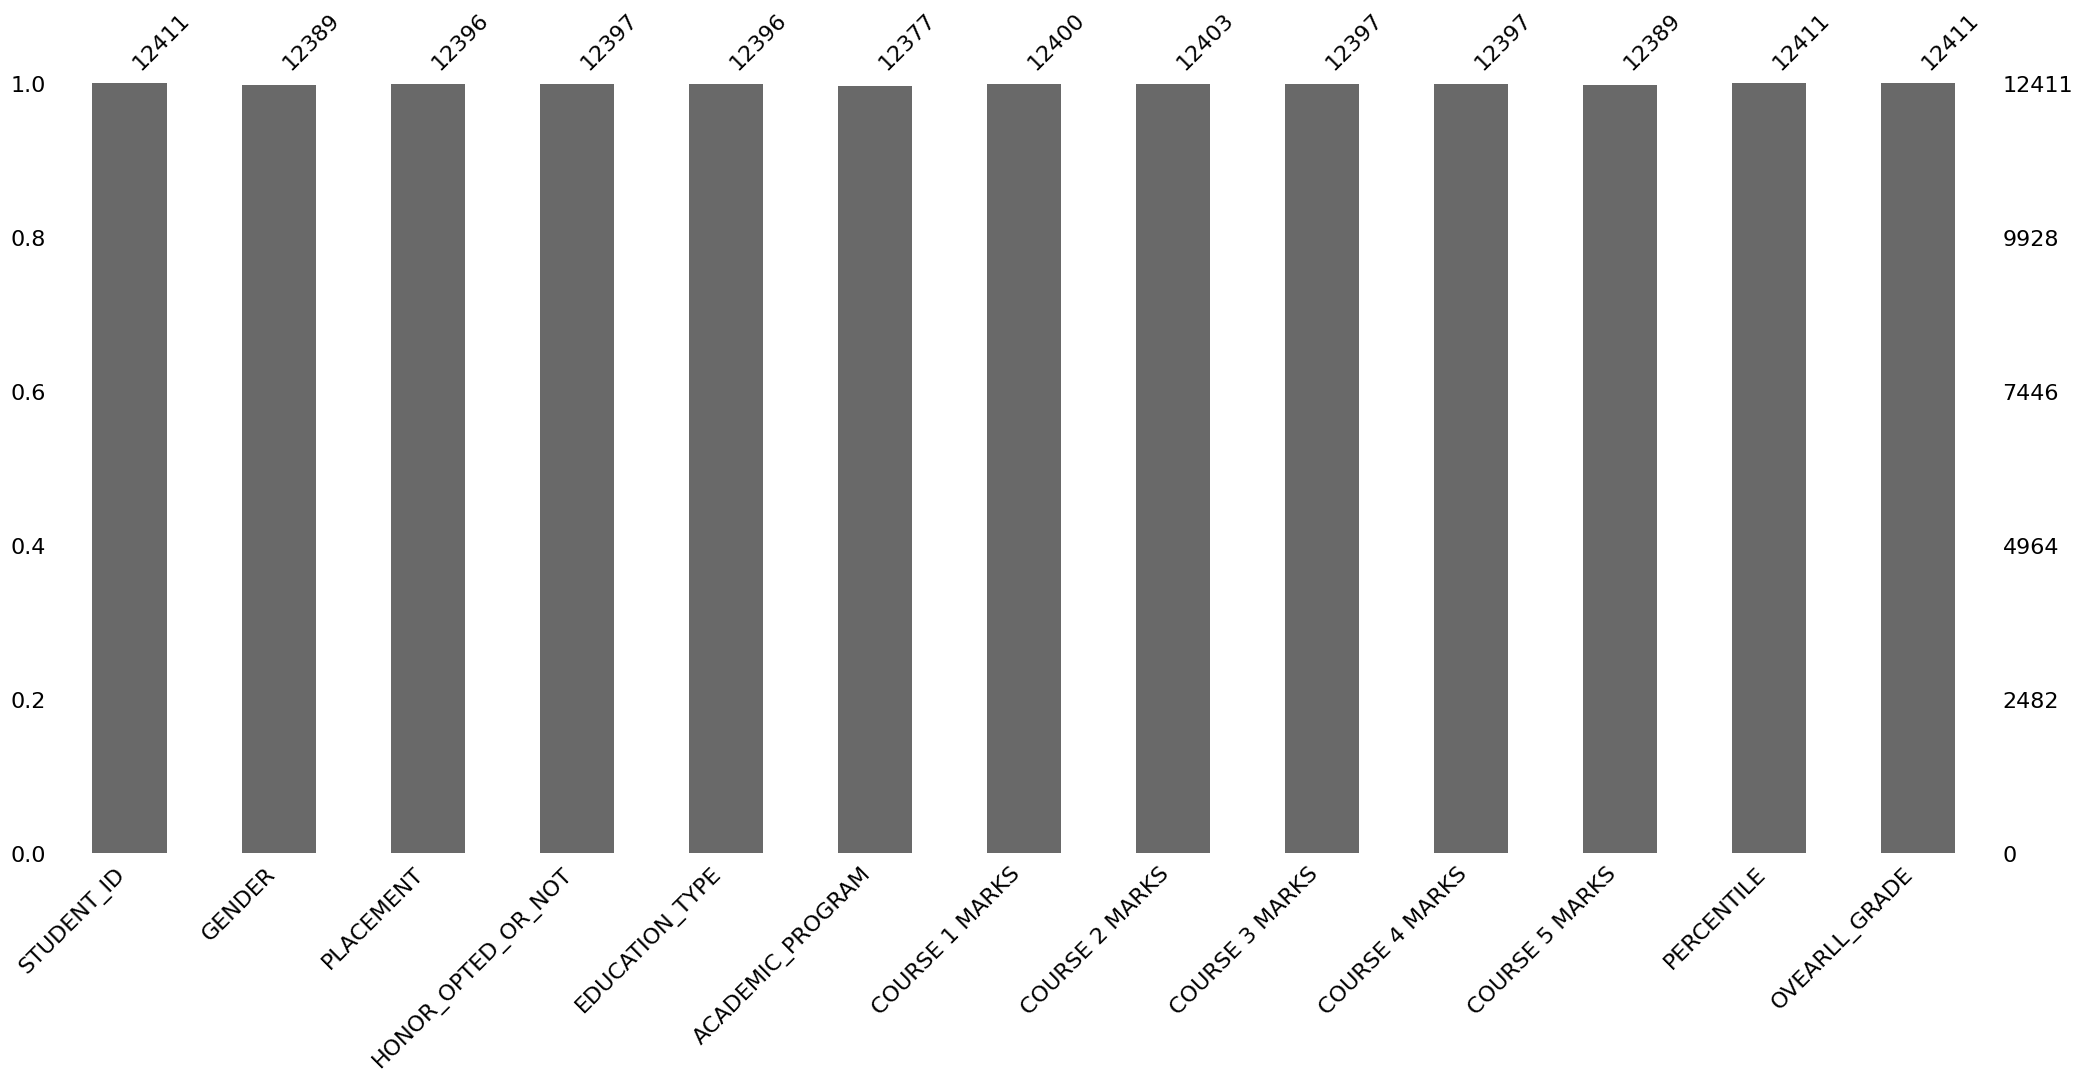

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
df['COURSE 1 MARKS'].fillna(df['COURSE 1 MARKS'].mean(), inplace=True)
#df['COURSE 1 MARKS']=df['COURSE 1 MARKS'].replace(np.NaN,df['COURSE 1 MARKS'].mean())

In [ ]:
df['COURSE 1 MARKS'].isnull().sum()

0

In [ ]:
df['COURSE 2 MARKS']=df['COURSE 2 MARKS'].fillna(0)
df['COURSE 2 MARKS'].isnull().sum()

0

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['STUDENT_ID', 'GENDER', 'PLACEMENT', 'HONOR_OPTED_OR_NOT',
       'EDUCATION_TYPE', 'ACADEMIC_PROGRAM', 'OVEARLL_GRADE'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer

# Create SimpleImputer instance with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')
# Reshape the input to a 2D array and then fit_transform
imputed_data = imputer.fit_transform(df[['ACADEMIC_PROGRAM']])

# Assign the imputed values back to the DataFrame column
df['ACADEMIC_PROGRAM'] = imputed_data.ravel()

# Print the DataFrame after imputation


df['ACADEMIC_PROGRAM'].isnull().sum()

0

In [ ]:
imputer=SimpleImputer(strategy='constant', fill_value='missing')
imputed_data=imputer.fit_transform(df[['GENDER']])
df['GENDER']=imputed_data.ravel()
df['GENDER'].isnull().sum()

0

In [ ]:
df=df.dropna()
df.isnull().sum()

STUDENT_ID            0
GENDER                0
PLACEMENT             0
HONOR_OPTED_OR_NOT    0
EDUCATION_TYPE        0
ACADEMIC_PROGRAM      0
COURSE 1 MARKS        0
COURSE 2 MARKS        0
COURSE 3 MARKS        0
COURSE 4 MARKS        0
COURSE 5 MARKS        0
PERCENTILE            0
OVEARLL_GRADE         0
dtype: int64

# FIND OUTLIERS

<Axes: xlabel='COURSE 1 MARKS'>

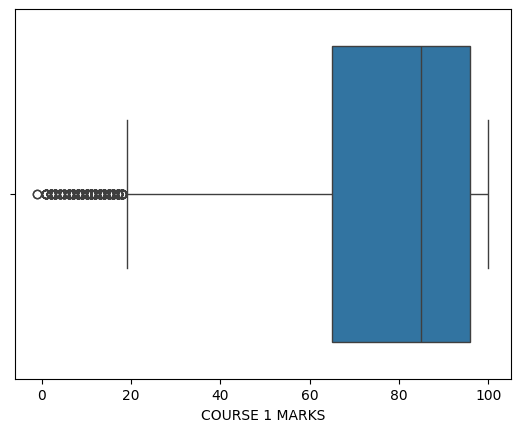

In [ ]:
#using seaborn
import seaborn as sns
sns.boxplot(x=df['COURSE 1 MARKS'],data=df)


# FIND OUTLIERS USING Z-SCORE

In [ ]:
import numpy as np
outlier=[]
def outlier_using_Zscore(data):

  thres=3
  mean=np.mean(data)
  std=np.std(data)
  for i in data:
    ZS=(i-mean)/std
    if(np.abs(ZS)>thres):
      outlier.append(i)
  return outlier

OT = outlier_using_Zscore(df['COURSE 1 MARKS'])
OT

# find outlier using IQR

In [ ]:
outlier=[]
def outlier_using_iqr(data):
  data=sorted(data)
  q1=np.percentile(data,25)
  q3=np.percentile(data,75)
  IQR=q3-q1
  l_bound=q1-(1.5*IQR)
  u_bound=q3+(1.5*IQR)
  for i in data:
    if(i<l_bound or i>u_bound):
      outlier.append(i)
  return outlier

outlier_using_iqr(df['COURSE 1 MARKS'])

[-1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0

# remove outlier using IQR

In [ ]:
import numpy as np

def cap_outliers_in_column(df_column):
    data = sorted(df_column)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR

    mean_value = (up_limit + low_limit) / 2
    return np.where(df_column < low_limit, low_limit,
                    np.where(df_column > up_limit, up_limit, df_column))

In [ ]:
numerical_feat=df.select_dtypes(include=(np.number)).columns
numerical_feat

Index(['COURSE 1 MARKS', 'COURSE 2 MARKS', 'COURSE 3 MARKS', 'COURSE 4 MARKS',
       'COURSE 5 MARKS', 'PERCENTILE'],
      dtype='object')

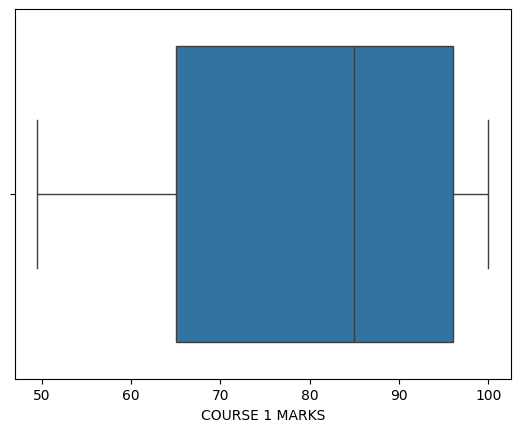

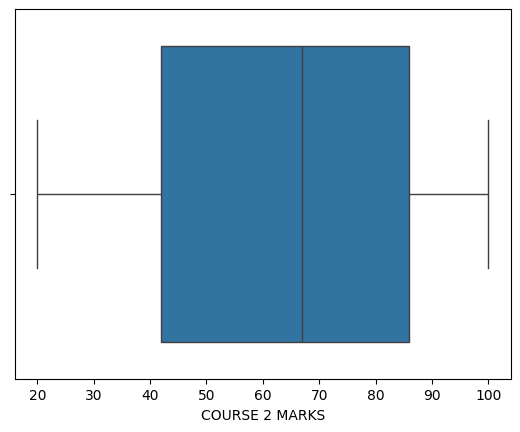

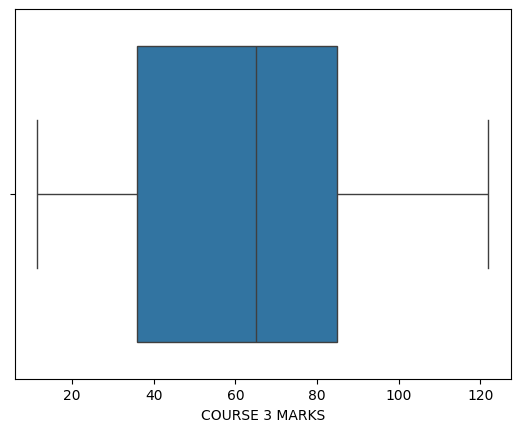

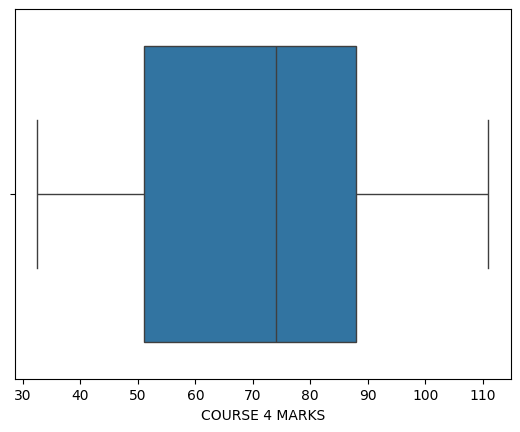

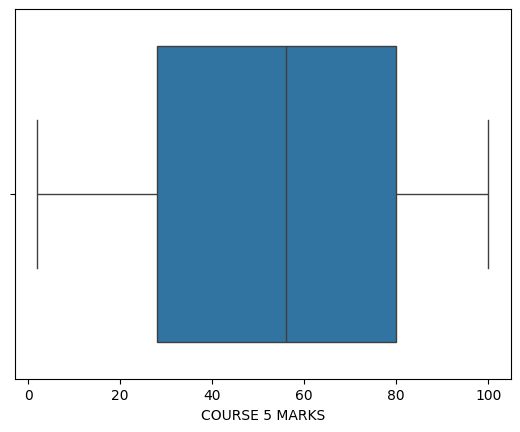

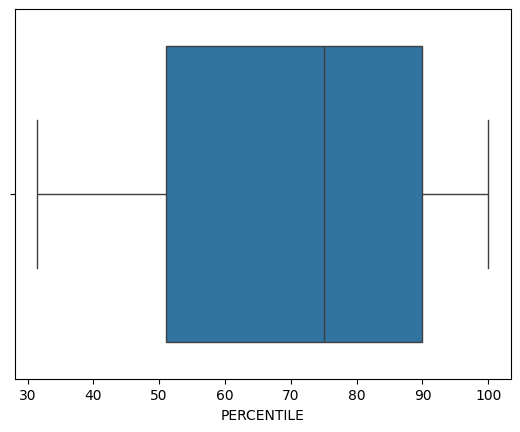

In [ ]:
%matplotlib inline
for col in numerical_feat:
  df[col] = cap_outliers_in_column(df[col] )
  sns.boxplot(x=df[col])
  plt.show()

In [ ]:
categorical_columns=df.select_dtypes(exclude=[np.number]).columns
categorical_columns

Index(['STUDENT_ID', 'GENDER', 'PLACEMENT', 'HONOR_OPTED_OR_NOT',
       'EDUCATION_TYPE', 'ACADEMIC_PROGRAM', 'OVEARLL_GRADE'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column in the list of categorical columns
for col in categorical_columns:
    # Apply label encoding to each value in the column
    df[col] = label_encoder.fit_transform(df[col])

# Print the encoded data
print("Encoded data:")
print(df)


Encoded data:
       STUDENT_ID  GENDER  PLACEMENT  HONOR_OPTED_OR_NOT  EDUCATION_TYPE  \
0               0       0          1                   1               0   
1               1       0          1                   1               0   
2               2       1          0                   1               0   
3               3       0          1                   1               0   
4               4       1          1                   1               0   
...           ...     ...        ...                 ...             ...   
12406       12317       1          1                   1               0   
12407       12318       1          1                   1               0   
12408       12319       1          1                   0               0   
12409       12320       0          1                   1               0   
12410       12321       1          0                   0               0   

       ACADEMIC_PROGRAM  COURSE 1 MARKS  COURSE 2 MARKS  COURSE 3 MARKS  